# Intro to Regression

## What is Linear Regression?
- Supervised learning, so we'll be using labeled data
- Used to predict continuous target variable outcomes
- Our features can be categorical and/or continuous
- Our categorical features need to be encoded
- Our continuous values should be scaled

## So What?
Examples of regressions used to predict a continuous target:
- Predict sales given the number of advertisements in a market
- Predict sales using internet traffic numbers and the number of print advertisements
- Predict a final grade using the midterm
- Predict lemonade sales using temperature and rainfall features
      
## Types of Linear Regression
- Simple Linear Regression (Use x to predict y)
- Multiple Linear Regression (Use multiple features to predict y)
- Multivariate Linear Regression (Use features to predict y and z)

### Simple Linear Regression Equation
- $y = mx + b$, also expressed as $y = b_0 + b_1x$
- Example: Use the total_bill to predict the tip amount
- Example: Use the midterm to predict the final grade
- Example: Predict sales given the number of customers in the store

### Multiple Linear Regression Equation
- $y = b_0 + b_1x_1 + b_2x_2 + ... + b_nx_n$
- Example: Predict lemonade sales using temperature and rainfall
- Example: Predict sales using internet traffic and visitor demographic information
- Example: Use the total_bill, table_size, and whether if it's lunch or dinner to predict the tip amount

### Assumptions of a Linear Regression
- Linear relationship between feature(s) + target
- Little or no multi-colinearity (that means correlation of features w/ each other)
- Normality Assumption that residuals are (approximately) normally distributed. We'll see this in Eval.
- Homoscedasticity, where residuals are equally distributed across the regression line. We'll see this in Eval.
- No auto-correlation. Auto-correlation is where a value correlates with a past value of itself. This is the land of time-series analysis, not regression. 

- If we're predicting this month's sales using last month's sales... time series 
- If we're predicting this month's sales based on the number of customers and their demographic info.. regression

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random

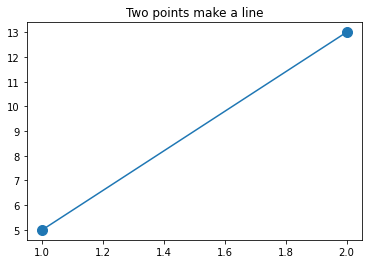

In [2]:
# slope is the mx part of y = mx + b
# the b part of y = mx + b is the y value when x = 0...
# so one you have y = mx + b, you can determine the y for any value of x
x = [1, 2]
y = [5, 13]
plt.title("Two points make a line")
plt.plot(x, y, marker=".", markersize=20)
plt.show()

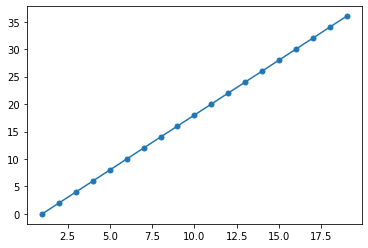

In [3]:
# If all of the points exist on the exact same line, then we don't need a regression, all we need is the equation!
x = range(1, 20)
y = [n*2 - 2 for n in x]
plt.plot(x, y, marker=".", markersize=10)
plt.show()

## What's the Big Idea of Regression?
- Approximate the equation underlying the relationship between the feature(s) and target
- Obtain the "line of best fit". The line that best approximates the relationship w/ the lowest amount of error
- Use that approximation to make predictions on new data points!

<AxesSubplot:xlabel='x', ylabel='y'>

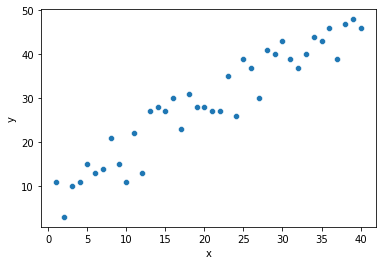

In [4]:
df = pd.DataFrame()
df["x"] = np.arange(1, 41)
df["randomness"] = np.random.randint(1, 15, 40)
df["y"] = df.x + df.randomness

sns.scatterplot(x="x", y="y", data=df)

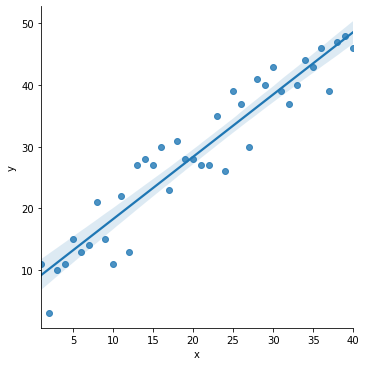

In [5]:
# LM = linear model
sns.lmplot(x="x", y="y", data=df)

In [6]:
# We can use .corr() super quickly to see the correlation between x and y 
df[["x", "y"]].corr()

,x,y
x,1.000000,0.949236
y,0.949236,1.000000


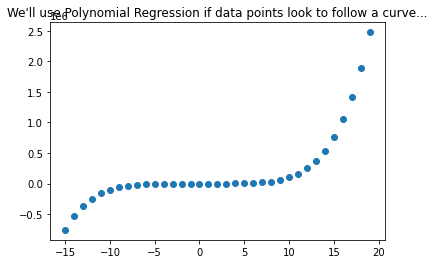

In [7]:
x = range(-15, 20)
y = [n**5 - 5 for n in x]
plt.title("We'll use Polynomial Regression if data points look to follow a curve...")
plt.scatter(x, y)
plt.show()

![overfit vs underfit vs good fit diagram](./overfit_underfit_diagram.png)

In [9]:
from pydataset import data
df = data('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
1,16.99,1.01,Female,No,Sun,Dinner,2
2,10.34,1.66,Male,No,Sun,Dinner,3
3,21.01,3.50,Male,No,Sun,Dinner,3
4,23.68,3.31,Male,No,Sun,Dinner,2
5,24.59,3.61,Female,No,Sun,Dinner,4


In [11]:
df[["total_bill", "tip"]].corr()

,total_bill,tip
total_bill,1.000000,0.675734
tip,0.675734,1.000000


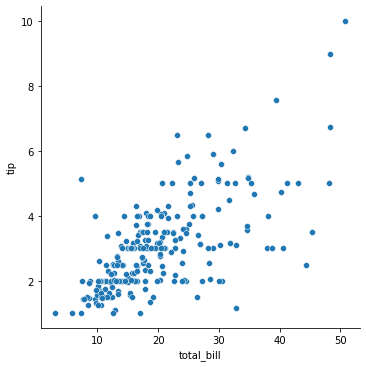

In [10]:
sns.relplot(x="total_bill", y="tip", data=df)

In [12]:
nonsmokers = df[df.smoker == "No"]
smokers = df[df.smoker == "Yes"]

In [13]:
nonsmokers[["total_bill", "tip"]].corr()

,total_bill,tip
total_bill,1.000000,0.822183
tip,0.822183,1.000000


In [15]:
smokers[["total_bill", "tip"]].corr()

,total_bill,tip
total_bill,1.000000,0.488218
tip,0.488218,1.000000


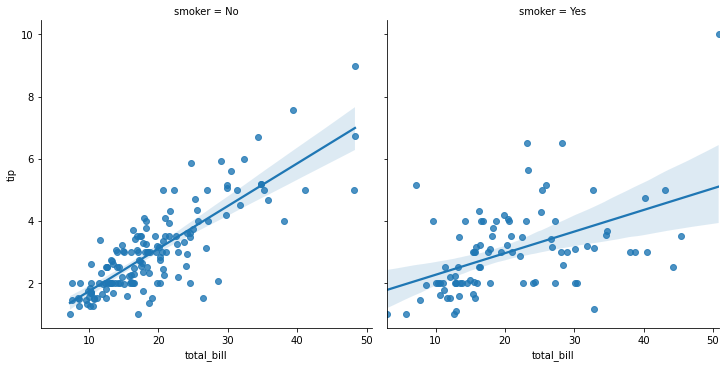

In [16]:
sns.lmplot(x="total_bill", y="tip", data=df, col="smoker")

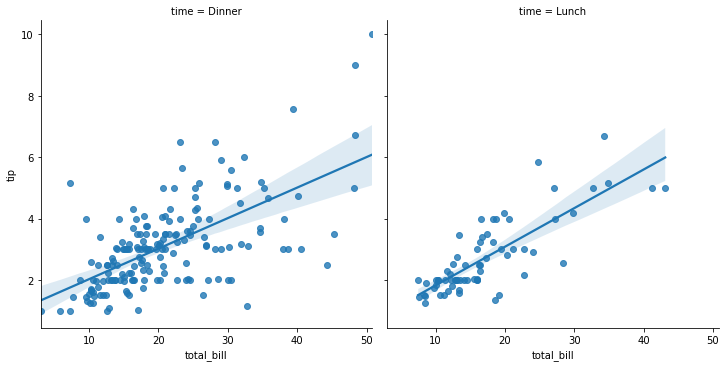

In [17]:
sns.lmplot(x="total_bill", y="tip", data=df, col="time")